# WESC 2023 - Simple Demo

In [1]:
# stdlib
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# wcomp
from wcomp import WCompFloris, WCompPyWake, WCompFoxes
from wcomp.plotting import plot_plane

# Path to the primary windIO input file
# CASE_DIR = Path(__file__).parent.resolve() / Path('compare_cases')
CASE_DIR = Path('cases_wesc2023')
case_1turbine = CASE_DIR / Path('single_turbine/wind_energy_system.yaml')
case_Nturbine = CASE_DIR / Path('many_turbine/IEA37_case_study_1_2_wind_energy_system.yaml')
case_bastankah = CASE_DIR / Path('bastankah/IEA37_case_study_1_2_wind_energy_system.yaml')

## 1 turbine case

This case demonstrates the `wcomp` capabilities to compare 1-D streamwise profile, 1-D cross sectional profile, and 2-D wake profiles at a given location.

In [2]:
# Create the data via each software's WComp interface

pywake_1turbine = WCompPyWake(case_1turbine)
floris_1turbine = WCompFloris(case_1turbine)
foxes_1turbine = WCompFoxes(case_1turbine)

ROTOR_D = floris_1turbine.rotor_diameter

# NOTE: Pywake plotting uses plt.gca -> plt.gcf... get current figure meaning it will add
# onto the current figure. Since PyWake does it, wcomp adopts this pattern, as well.

Turbine 0, T0: windio_turbine


### Streamwise 1D profile of the wake


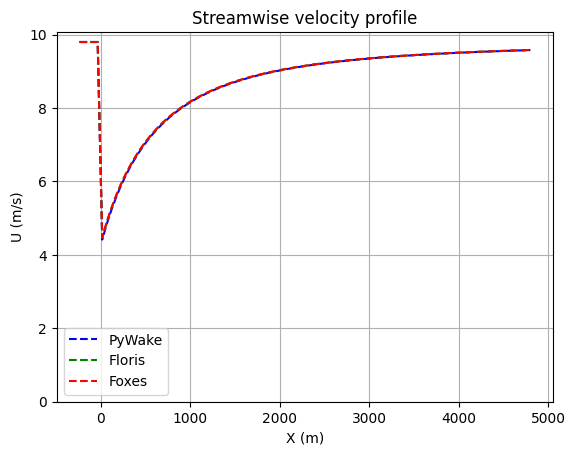

In [3]:
XMIN = -1 * ROTOR_D
XMAX = 20 * ROTOR_D
fig, ax = plt.subplots()
pywake_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
floris_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.set_title("Streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()

### Cross section 1D profile of the wake

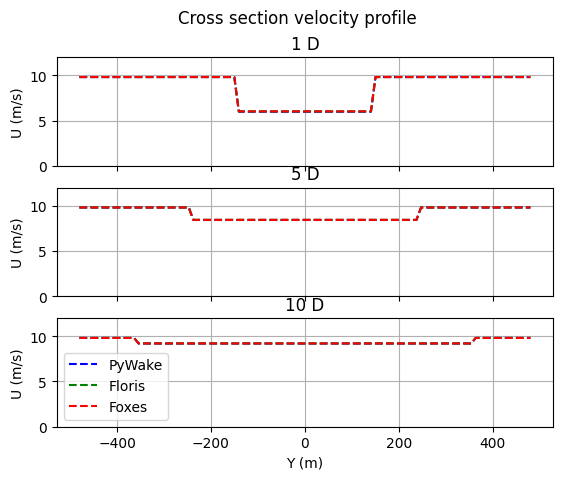

In [4]:
YMIN = -2 * ROTOR_D
YMAX =  2 * ROTOR_D

fig, ax = plt.subplots(3, 1)
fig.suptitle("Cross section velocity profile")

X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    pywake_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    floris_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()

### Horizontal 2D turbine wake profile and diff plot

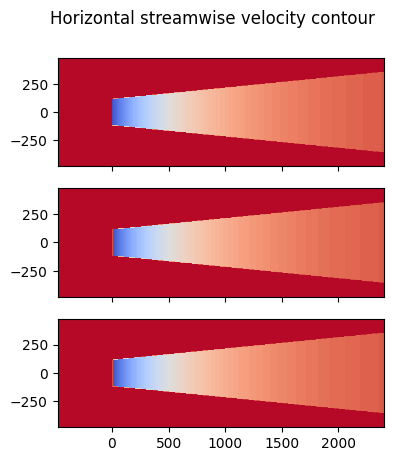

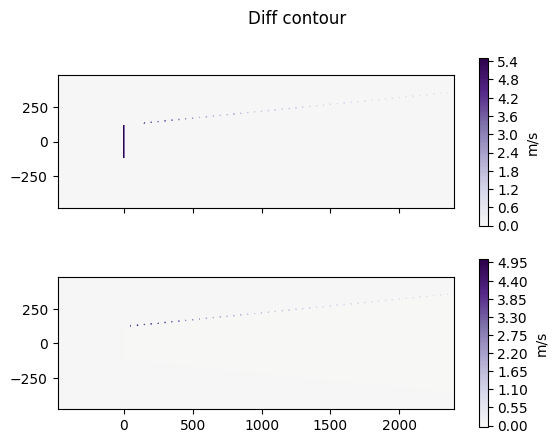

In [5]:
fig, ax = plt.subplots(3, 1)
fig.suptitle("Horizontal streamwise velocity contour")

plt.axes(ax[0])
ax[0].xaxis.set_ticklabels([])
pywake_plane = pywake_1turbine.horizontal_contour(wind_direction=270)

plt.axes(ax[1])
ax[1].xaxis.set_ticklabels([])
floris_plane = floris_1turbine.horizontal_contour(wind_direction=270)

plt.axes(ax[2])
foxes_plane = foxes_1turbine.horizontal_contour(wind_direction=270)

# Diff of the 2D wakes
fig, ax = plt.subplots(2, 1)
fig.suptitle("Diff contour")

plt.axes(ax[0])
ax[0].xaxis.set_ticklabels([])
diff = floris_plane - pywake_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax[0],
    min_speed=min_speed,
    max_speed=max_speed,
    cmap='PuOr',
    clevels=100,
    color_bar=True,
    title="FLORIS - PyWake"
)

plt.axes(ax[1])
diff = floris_plane - foxes_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax[1],
    min_speed=min_speed,
    max_speed=max_speed,
    cmap='PuOr',
    clevels=100,
    color_bar=True,
    title="FLORIS - foxes"
)

## 16 turbine case

This case shows the ability scale the comparisons to the wind farm level by creating a new case in the `windIO` description.

In [6]:
pywake_Nturbine = WCompPyWake(case_Nturbine)
floris_Nturbine = WCompFloris(case_Nturbine)
foxes_Nturbine = WCompFoxes(case_Nturbine)

Turbine 0, T0: windio_turbine
Turbine 1, T1: windio_turbine
Turbine 2, T2: windio_turbine
Turbine 3, T3: windio_turbine
Turbine 4, T4: windio_turbine
Turbine 5, T5: windio_turbine
Turbine 6, T6: windio_turbine
Turbine 7, T7: windio_turbine
Turbine 8, T8: windio_turbine
Turbine 9, T9: windio_turbine
Turbine 10, T10: windio_turbine
Turbine 11, T11: windio_turbine
Turbine 12, T12: windio_turbine
Turbine 13, T13: windio_turbine
Turbine 14, T14: windio_turbine
Turbine 15, T15: windio_turbine


### Horiztonal 2-D farm profiles

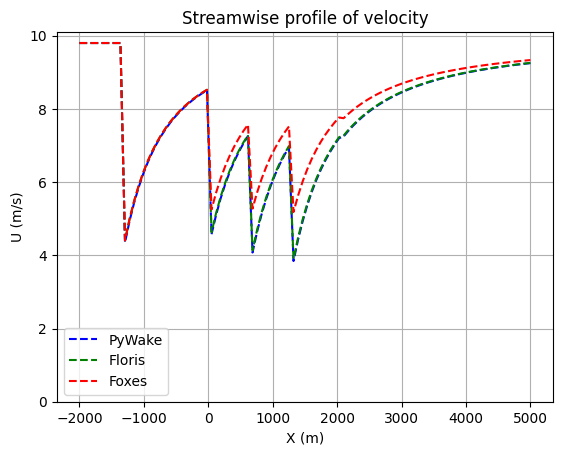

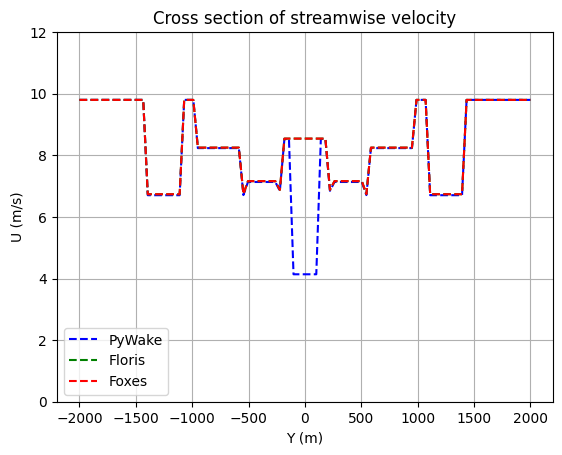

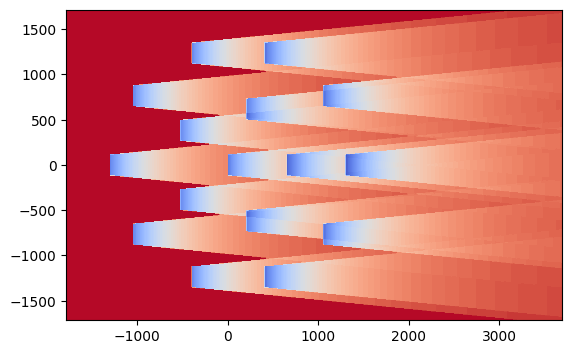

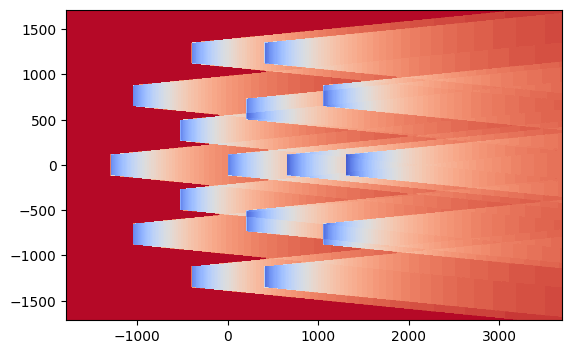

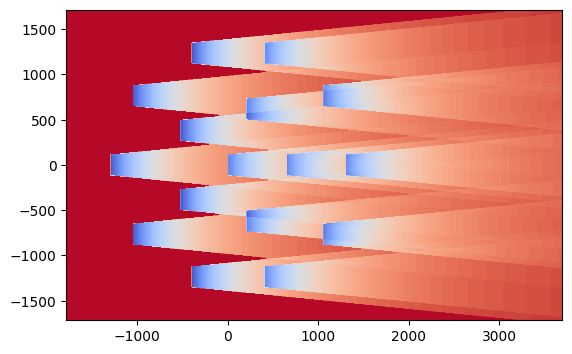

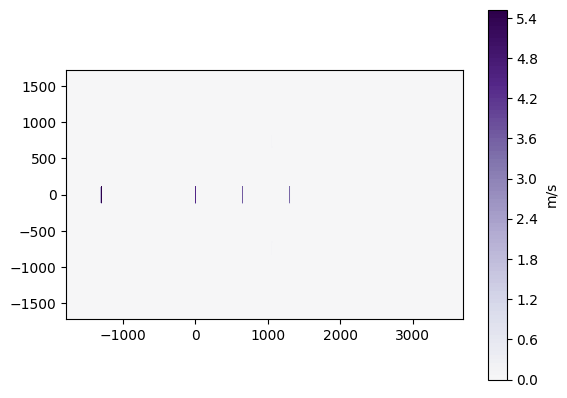

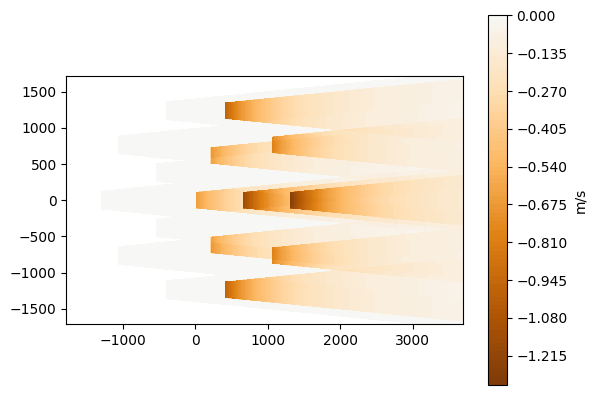

In [7]:
XMIN = -2000
XMAX = 5000
fig, ax = plt.subplots()
pywake_Nturbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
floris_Nturbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_Nturbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.set_title("Streamwise profile of velocity")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()

YMIN = -2000
YMAX =  2000
fig, ax = plt.subplots()
pywake_Nturbine.xsection_profile_plot(wind_direction=270, x_coordinate=0.0, ymin=YMIN, ymax=YMAX)
floris_Nturbine.xsection_profile_plot(wind_direction=270, x_coordinate=0.0, ymin=YMIN, ymax=YMAX)
foxes_Nturbine.xsection_profile_plot(wind_direction=270, x_coordinate=0.0, ymin=YMIN, ymax=YMAX)
ax.set_title("Cross section of streamwise velocity")
ax.set_xlabel("Y (m)")
ax.set_ylabel("U (m/s)")
ax.set_ybound(lower=0.0, upper=12.0)
ax.legend()
ax.grid()


fig, ax = plt.subplots()
pywake_plane = pywake_Nturbine.horizontal_contour(wind_direction=270)

fig, ax = plt.subplots()
floris_plane = floris_Nturbine.horizontal_contour(wind_direction=270)

fig, ax = plt.subplots()
foxes_plane = foxes_Nturbine.horizontal_contour(wind_direction=270)

fig, ax = plt.subplots()
diff = floris_plane - pywake_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax,
    color_bar=True,
    clevels=100,
    cmap='PuOr',
    min_speed=min_speed,
    max_speed=max_speed,
)

fig, ax = plt.subplots()
diff = floris_plane - foxes_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax,
    color_bar=True,
    clevels=100,
    cmap='PuOr',
    min_speed=min_speed,
    max_speed=max_speed,
)

## Analyzing additional models

Similarly, comparing results for different wake models requires only creating a new `windIO` case description.

Turbine 0, T0: windio_turbine
Turbine 1, T1: windio_turbine
Turbine 2, T2: windio_turbine
Turbine 3, T3: windio_turbine
Turbine 4, T4: windio_turbine
Turbine 5, T5: windio_turbine
Turbine 6, T6: windio_turbine
Turbine 7, T7: windio_turbine
Turbine 8, T8: windio_turbine
Turbine 9, T9: windio_turbine
Turbine 10, T10: windio_turbine
Turbine 11, T11: windio_turbine
Turbine 12, T12: windio_turbine
Turbine 13, T13: windio_turbine
Turbine 14, T14: windio_turbine
Turbine 15, T15: windio_turbine


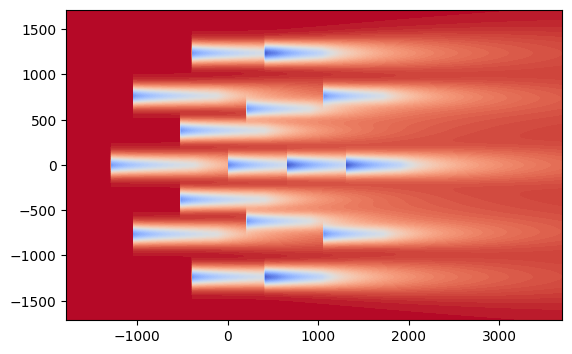

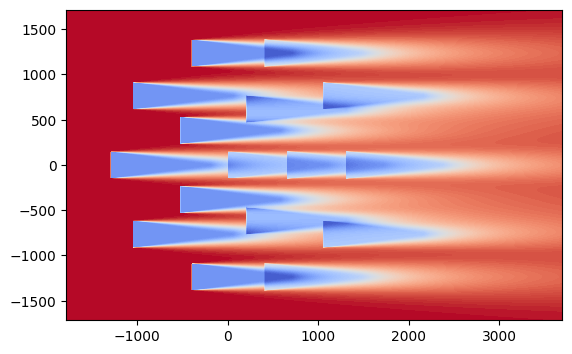

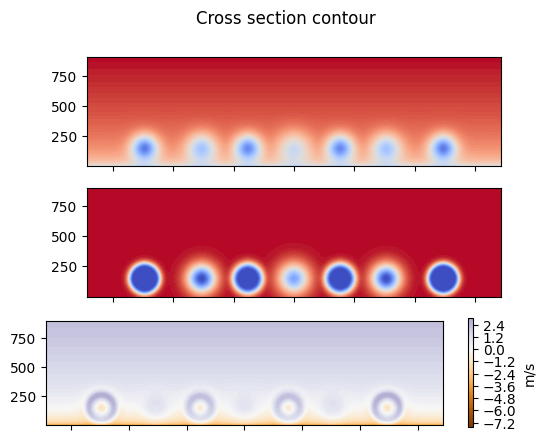

In [8]:
# pywake_bastankah = WCompPyWake(case_bastankah)
floris_bastankah = WCompFloris(case_bastankah)
foxes_bastankah = WCompFoxes(case_bastankah)

# fig, ax = plt.subplots()
# pywake_plane = pywake_bastankah.horizontal_contour(wind_direction=270)

fig, ax = plt.subplots()
floris_plane = floris_bastankah.horizontal_contour(wind_direction=270)

fig, ax = plt.subplots()
foxes_plane = foxes_bastankah.horizontal_contour(wind_direction=270)

# Cross section of the wake
fig, ax = plt.subplots(3, 1)
fig.suptitle("Cross section contour")

plt.axes(ax[0])
ax[0].xaxis.set_ticklabels([])
# pywake_plane = pywake_bastankah.xsection_contour(wind_direction=270, x_coordinate=0.0)
floris_plane = floris_bastankah.xsection_contour(wind_direction=270, x_coordinate=0.0)

plt.axes(ax[1])
ax[1].xaxis.set_ticklabels([])
foxes_plane = foxes_bastankah.xsection_contour(wind_direction=270, x_coordinate=0.0)

plt.axes(ax[2])
ax[2].xaxis.set_ticklabels([])
diff = floris_plane - foxes_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax[2],
    min_speed=min_speed,
    max_speed=max_speed,
    cmap='PuOr',
    clevels=100,
    color_bar=True,
    title="Middle - Top"
)